In [1]:
# kütüphaneler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib
matplotlib.style.use("ggplot")

In [2]:
#veri setini yükleme
df = pd.read_csv("/content/heart.csv")

**Veri Setine Genel Bakış**

Bu veri seti, kardiyovasküler hastalıkların erken teşhisini tespit etmek için kullanılabilecek 11 özellik içeriyor. Hastaların yaş, cinsiyet, göğüs ağrısı tipi, dinlenme kan basıncı, serum kolesterol, açlık kan şekeri gibi özelliklerinin yanı sıra, egzersize bağlı anjina, elektrokardiyogram sonuçları ve maksimum kalp atım hızı gibi önemli belirteçler de bulunuyor.

**Değişkenler:**

* `Age`: age of the patient [years]
* `Sex`: sex of the patient [M: Male, F: Female]
* `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* `RestingBP`: resting blood pressure [mm Hg]
* `Cholesterol`: serum cholesterol [mm/dl]
* `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
* `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
* `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
* `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* `HeartDisease`: output class [1: heart disease, 0: Normal]




In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

* Veri seti 6 nümerik, 5 kategorik değişkenden oluşuyor.

In [6]:
df.shape

(918, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Özet İstatistikler**

In [8]:
#sayısal değişkenler için:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [9]:
#kategorik değişkenler için:
df.describe(include='O').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [10]:
#boş değer kontrolü
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# EDA

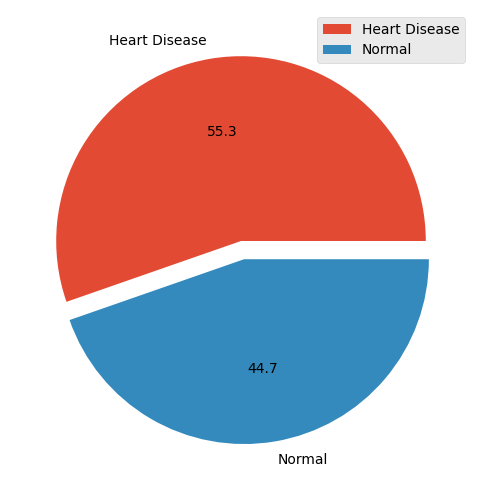

In [11]:
#Kalp hastalığına sahip olan ve olmayan kişilerin oranı
labels = ["Heart Disease","Normal"]
count = df["HeartDisease"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(count, labels = labels, autopct='%.1f', explode=(0,0.1))
plt.legend(labels = labels)
plt.show()

In [12]:
df["Sex"].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

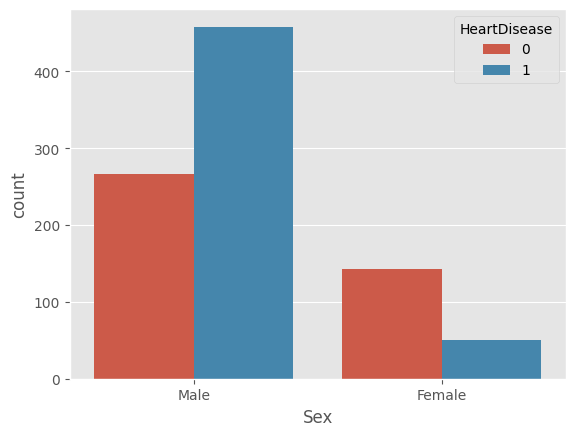

In [13]:
#Cinsiyete göre kalp hastalarının oranı
sns.countplot(df, x = "Sex", hue = "HeartDisease")
plt.xticks(["M","F"], ['Male', 'Female'])
plt.show()

Çıkarımlar:

* Veri seti daha çok erkeklerden oluşuyor.
* Kadınlarda hasta sayısı erkeklere oranla daha az.




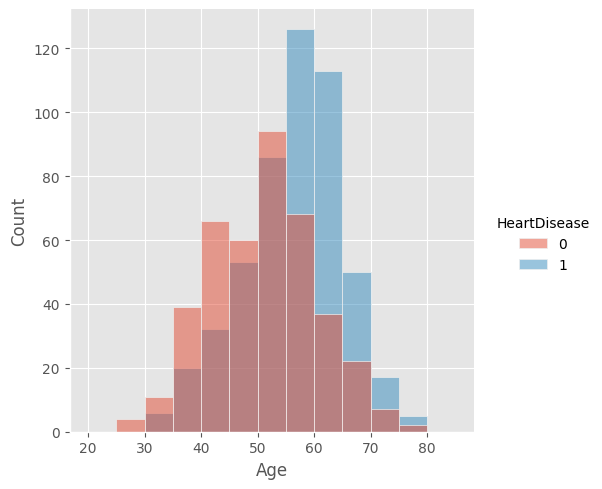

In [17]:
#Hangi yaş gruplarında kalp hastalığı daha fazla?
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
sns.displot(df, x = "Age", hue = "HeartDisease", bins = bins)
plt.show()

55-60 yaş aralığında kalp rahatsızlığı daha fazla gözlemleniyor.


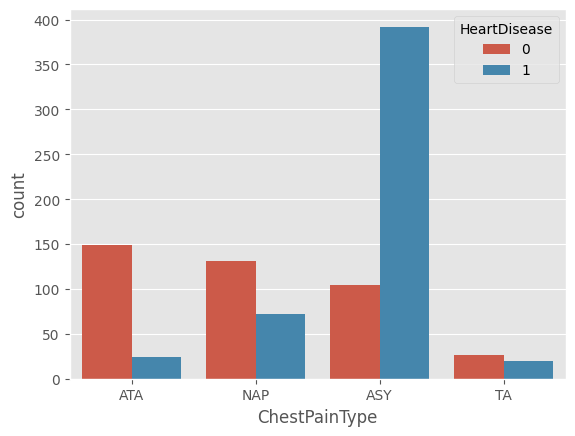

In [18]:
sns.countplot(df, x="ChestPainType", hue="HeartDisease")
plt.show()

En yüksek kalp hastalığı oranı ASY (Asemptomatik) tipi göğüs ağrısında görülmektedir.

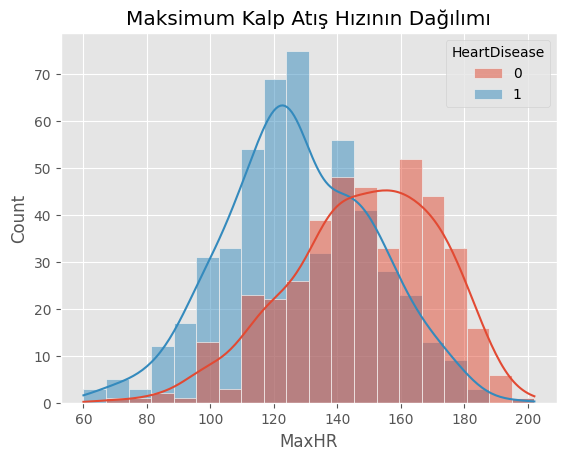

In [19]:
sns.histplot(df, x="MaxHR", hue = "HeartDisease", kde = True)
plt.title("Maksimum Kalp Atış Hızının Dağılımı")
plt.show()

Kalp rahatsızlığına sahip olmayanlar olanlara kıyasla daha yüksek (160 civarında) bir kalp atış hızına sahip olduğu gözlenmektedir.

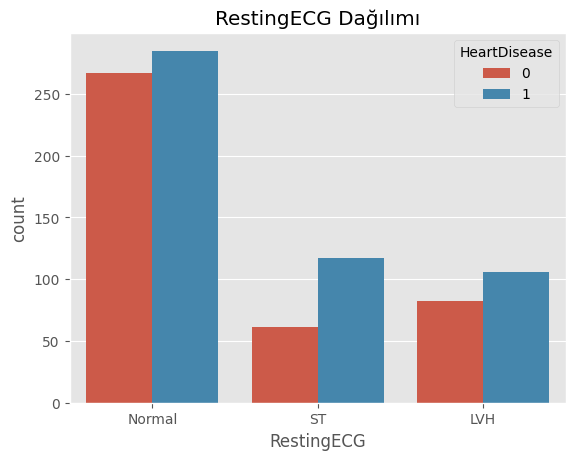

In [20]:
#Hangi tür EKG'de kalp hastası sayısı daha fazladır?
sns.countplot(df, x = "RestingECG", hue= "HeartDisease")
plt.title("RestingECG Dağılımı")
plt.show()

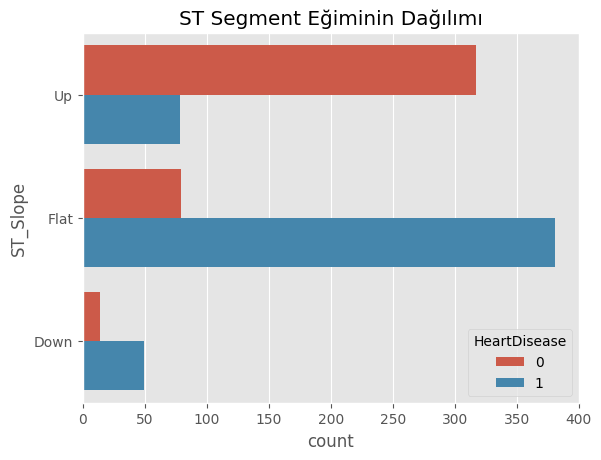

In [21]:
#Kalp hastalarında ne tür bir ST segment eğilimi görülür?
sns.countplot(df, y = "ST_Slope", hue= "HeartDisease")
plt.title("ST Segment Eğiminin Dağılımı")
plt.show()

Kalp hastalarında büyük bir farkla düz bir ST segment eğimi gözlenmektedir.

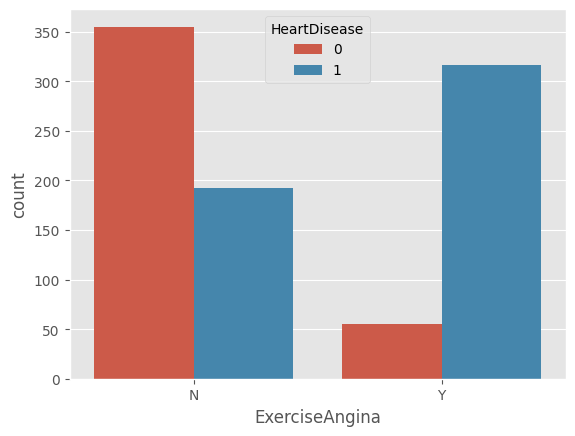

In [22]:
sns.countplot(df, x = "ExerciseAngina", hue  = "HeartDisease")
plt.show()

Kalp hastalığına sahip olan kişiler, olmayanlara göre egzersize bağlı anginaya yakalanma olasılıkları daha yüksektir.

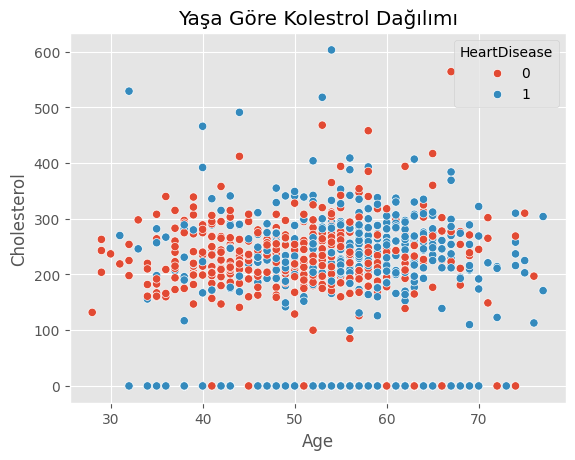

In [23]:
sns.scatterplot(df, x = "Age", y = "Cholesterol", hue = "HeartDisease")
plt.title("Yaşa Göre Kolestrol Dağılımı")
plt.show()

<Figure size 1000x800 with 0 Axes>

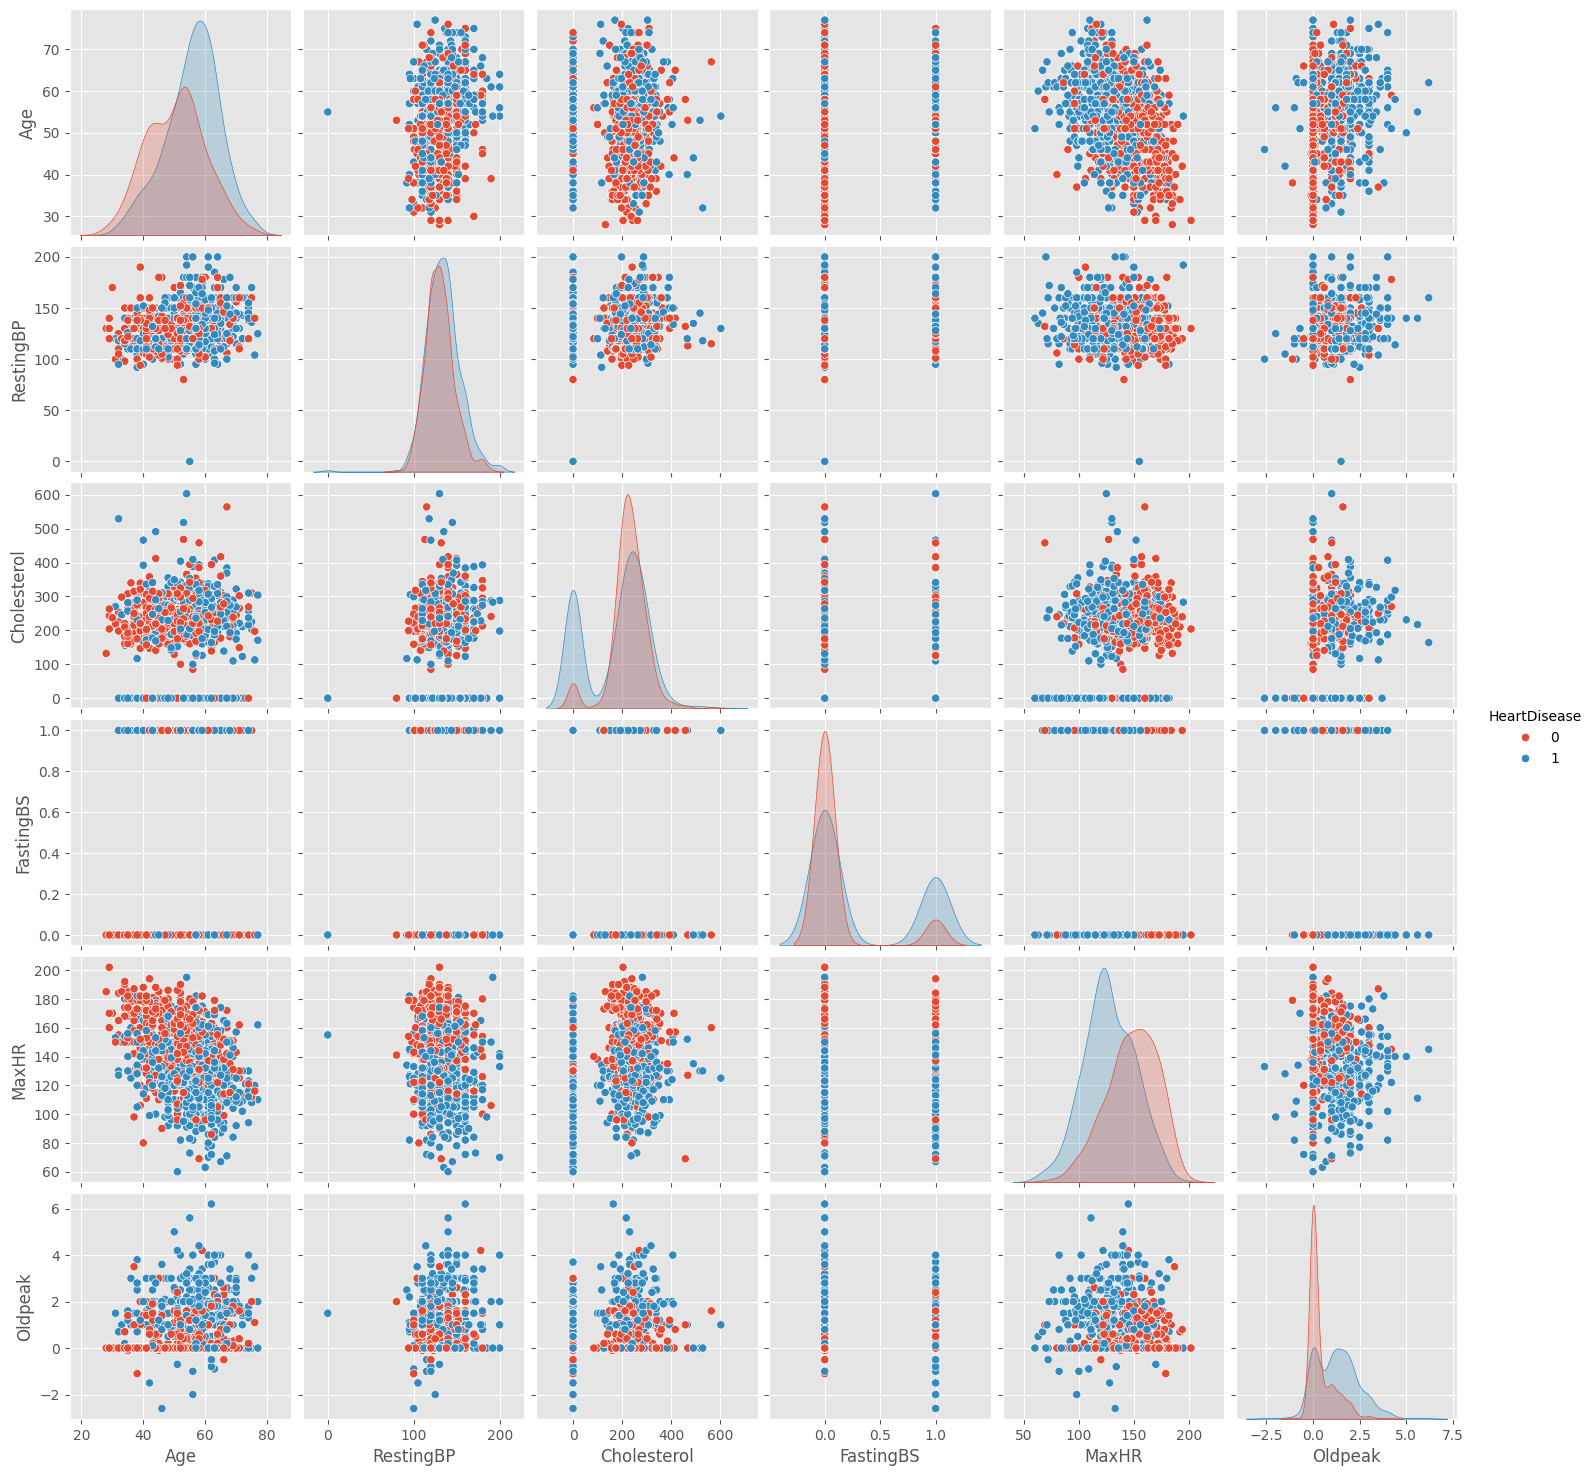

In [24]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue = "HeartDisease")
plt.show()

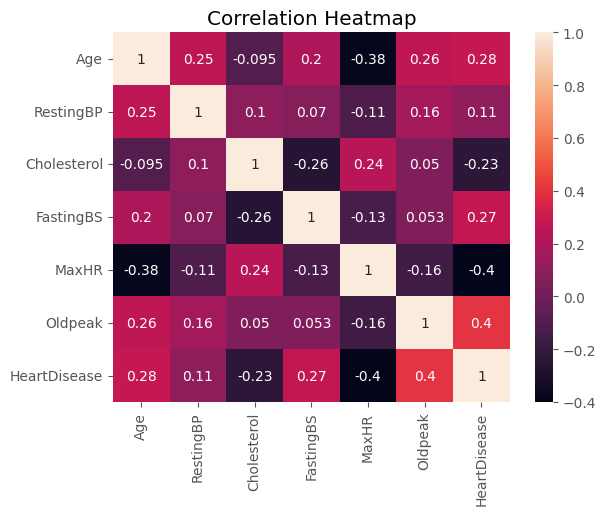

In [25]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Data Preprocessing

**Label Encoding**

Veri setinde bulunan kategorik değişkenleri Label Encoding ile sayısal değişkene çevirelim.

In [27]:
from sklearn.preprocessing import LabelEncoder

# Label encoding için kategorik değişkenleri seçelim
categorical_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

label_encoder = LabelEncoder()

# Her bir kategorik değişkene label encoding yapalım
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [28]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


**Standardization**

In [29]:
from sklearn.preprocessing import StandardScaler

X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

scale = StandardScaler()
X = scale.fit_transform(X)

# Modeling

Çoğu yüksek riskli tespit durumunda (örneğin kanser tespiti gibi), recall, precisiondan daha önemli bir değerlendirme metriğidir.(https://www.v7labs.com/blog/precision-vs-recall-guide#:~:text=In%20most%20high%2Drisk%20disease,the%20correctness%20of%20our%20model.)

Kalp yetmezliği tahmini durumunda, yanlış negatiflerden mümkün olduğunca kaçınmak istiyoruz. Yanlış negatif bir durum, bir kalp yetmezliği sorununun tespit edilmediği anlamına gelir ki bu çok tehlikeli olabilir.

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
# eğitim ve test kümeleri
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

**Logistic Regression**

In [54]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[105  21]
 [ 21 129]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       126
           1       0.86      0.86      0.86       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [55]:
score = cross_val_score(lg_model, X_train, y_train, cv=5, scoring='recall')
lg_cv_score = score.mean()

print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', lg_cv_score)

Cross Validation Recall scores are: [0.93055556 0.90277778 0.75       0.85915493 0.91549296]
Average Cross Validation Recall score:  0.8715962441314554


**Random Forest**

In [56]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[103  23]
 [ 17 133]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       126
           1       0.85      0.89      0.87       150

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



In [57]:
score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='recall')
rf_cv_score = score.mean()

print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', rf_cv_score)

Cross Validation Recall scores are: [0.91666667 0.91666667 0.88888889 0.91549296 0.94366197]
Average Cross Validation Recall score:  0.9162754303599374


**XGBoost**

In [58]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[104  22]
 [ 19 131]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       126
           1       0.86      0.87      0.86       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [59]:
score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='recall')
xgb_cv_score = score.mean()

print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', xgb_cv_score)

Cross Validation Recall scores are: [0.875      0.90277778 0.83333333 0.90140845 0.92957746]
Average Cross Validation Recall score:  0.8884194053208138


**KNN**

In [60]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[110  16]
 [ 22 128]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       126
           1       0.89      0.85      0.87       150

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



In [61]:
score = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='recall')
knn_cv_score = score.mean()

print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', knn_cv_score)

Cross Validation Recall scores are: [0.91666667 0.91666667 0.77777778 0.85915493 0.90140845]
Average Cross Validation Recall score:  0.8743348982785601


**SVM**

In [62]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[102  24]
 [ 16 134]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       126
           1       0.85      0.89      0.87       150

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



In [63]:
score = cross_val_score(svc_model, X_train, y_train, cv=5, scoring='recall')
svc_cv_score = score.mean()

print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', svc_cv_score)

Cross Validation Recall scores are: [0.94444444 0.88888889 0.86111111 0.91549296 0.92957746]
Average Cross Validation Recall score:  0.9079029733959312


En yüksek ortalama recall değerine sahip model Random Forest algoritması olduğundan dolayı bu modelle ilerleyeceğim.

# Hyperparameter Optimization

Grid Search yöntemiyle seçtiğim modelin hiper parametrelerini optimize ediyorum.

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

In [65]:
params = {
    'n_estimators': [130,150,170,190,200],
    'max_depth': [8,10,12,14],
    'min_samples_split': [3,4,5,6],
    'min_samples_leaf': [1,2,3],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf_model, param_grid=params, cv=5, scoring="recall").fit(X_train, y_train)

print("Best parameters: ", grid_rf.best_params_)
print("Best score", grid_rf.best_score_)

Best parameters:  {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150, 'random_state': 13}
Best score 0.9219483568075116


In [66]:
rf_after = RandomForestClassifier(max_depth = 8, min_samples_leaf = 1, min_samples_split = 6, n_estimators = 150, random_state = 13)

after_score = cross_val_score(rf_after, X_train, y_train, cv=5, scoring='recall')
after_avg_score = after_score.mean()

print('Cross Validation Recall scores are: {}'.format(after_score))
print('Average Cross Validation Recall score: ', after_avg_score)

Cross Validation Recall scores are: [0.91666667 0.90277778 0.88888889 0.92957746 0.97183099]
Average Cross Validation Recall score:  0.9219483568075116


**Sonuç:**

Random Forest modelinin recall ortalamasını optimizasyonla birlikte %91.6'dan %92.1'e çıkarttık.